# Basic transfer learning with cats and dogs data

## Import tensorflow
The code snippet you provided is intended for Google Colab, where you can switch between different versions of TensorFlow using the %tensorflow_version magic command. This command is only available in Colab, and attempting to use it outside Colab will raise an exception.

Here’s what happens:

try block: This attempts to use the %tensorflow_version 2.x magic command to ensure that TensorFlow version 2.x is being used.

except block: If the code is run outside of Colab (where %tensorflow_version doesn't exist), it catches the exception and prevents the code from breaking.

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## Import modules and download the cats and dogs dataset.

The code you provided downloads a dataset of cats and dogs from the internet, extracts it, and prepares it for further processing in a deep learning task. Here’s a breakdown of what each part of the code does:

Step-by-step Explanation:
Importing libraries:


*   urllib.request: Used to download files from a URL.
*   os: Used to interact with the operating system, such as handling directories and files.

*   zipfile: Used to extract .zip files.
*   random: Can be used for generating random numbers or selecting random items.

*   ImageDataGenerator, layers, Model: These are parts of the TensorFlow/Keras library for creating models and augmenting image datasets.
*   InceptionV3: A pre-trained model from TensorFlow.

*   RMSprop: An optimizer from TensorFlow.
*  shutil.copyfile: Used to copy files.




*   data_url: The link to the dataset (a .zip file) containing images of cats and dogs.
*   urllib.request.urlretrieve: Downloads the dataset and saves it as "catsdogs.zip" in the current working directory.

*   zipfile.ZipFile: Opens the downloaded zip file.
*   extractall(download_dir): Extracts the contents of the zip file into a directory (in this case, /tmp/)


In [ ]:
import urllib.request
import os
import zipfile
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop
from shutil import copyfile


data_url = "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip"
data_file_name = "catsdogs.zip"
download_dir = '/tmp/'
urllib.request.urlretrieve(data_url, data_file_name)
zip_ref = zipfile.ZipFile(data_file_name, 'r')
zip_ref.extractall(download_dir)
zip_ref.close()


Check that the dataset has the expected number of examples.

In [ ]:
print("Number of cat images:",len(os.listdir('/tmp/PetImages/Cat/')))
print("Number of dog images:", len(os.listdir('/tmp/PetImages/Dog/')))

# Expected Output:
# Number of cat images: 12501
# Number of dog images: 12501

Number of cat images: 12501
Number of dog images: 12501


Create some folders that will store the training and test data.
- There will be a training folder and a testing folder.
- Each of these will have a subfolder for cats and another subfolder for dogs.

Here is the directory folders explanation
- /tmp/cats-v-dogs/: The main directory.
- /tmp/cats-v-dogs/training/: Directory to store training data.
- /tmp/cats-v-dogs/testing/: Directory to store testing data.
- /tmp/cats-v-dogs/training/cats: Subdirectory for training images of cats.
- /tmp/cats-v-dogs/training/dogs: Subdirectory for training images of dogs.
- /tmp/cats-v-dogs/testing/cats: Subdirectory for testing images of cats.
- /tmp/cats-v-dogs/testing/dogs: Subdirectory for testing images of dogs.

In [ ]:
try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

## Split data into training and test sets

- The following code put first checks if an image file is empty (zero length)
- Of the files that are not empty, it puts 90% of the data into the training set, and 10% into the test set.

In [ ]:
import random
from shutil import copyfile
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    '''filename contains just the name of the file (e.g., cat1.jpg), not the full path to it.
      To access the file, you need the full path, which is the directory (SOURCE) plus the file name.
      SOURCE is the path to the directory (e.g., /tmp/cats-v-dogs/training/cats/), and filename is the file name (e.g., cat1.jpg).
      When you concatenate SOURCE + filename, the result is the full path: /tmp/cats-v-dogs/training/cats/cat1.jpg.
    '''
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    '''By passing the length of the list, you're effectively asking
    random.sample() to return all the elements of files, but in a randomly shuffled order.
    '''
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    '''It doesn't move the file but creates a new copy of the file at the
    destination. The file cat1.jpg remains in the original source folder,
    and another cat1.jpg is created in the destination folder.
    '''
    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


Check that the training and test sets are the expected lengths.

In [ ]:
print("Number of training cat images", len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print("Number of training dog images", len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print("Number of testing cat images", len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print("Number of testing dog images", len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

# expected output
# Number of training cat images 11250
# Number of training dog images 11250
# Number of testing cat images 1250
# Number of testing dog images 1250

Number of training cat images 11250
Number of training dog images 11250
Number of testing cat images 1250
Number of testing dog images 1250


## Data augmentation (try adjusting the parameters)!

Here, you'll use the `ImageDataGenerator` to perform data augmentation.  
- Things like rotating and flipping the existing images allows you to generate training data that is more varied, and can help the model generalize better during training.  
- You can also use the data generator to apply data augmentation to the validation set.

You can use the default parameter values for a first pass through this lab.
- Later, try to experiment with the parameters of `ImageDataGenerator` to improve the model's performance.
- Try to drive reach 99.9% validation accuracy or better.

In [ ]:
TRAINING_DIR = "/tmp/cats-v-dogs/training/"
# Experiment with your own parameters to reach 99.9% validation accuracy or better
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "/tmp/cats-v-dogs/testing/"

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))



Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


## Get and prepare the model

You'll be using the `InceptionV3` model.  
- Since you're making use of transfer learning, you'll load the pre-trained weights of the model.
- You'll also freeze the existing layers so that they aren't trained on your downstream task with the cats and dogs data.
- You'll also get a reference to the last layer, 'mixed7' because you'll add some layers after this last layer.

Adjustments of InceptionV3 model:

- You're excluding the top (fully connected) layers by setting include_top=False. This is common in transfer learning, where you reuse the convolutional layers as a feature extractor.
- You're specifying your own input shape of (150, 150, 3), meaning your input images are 150x150 pixels with 3 color channels (RGB).
- You're not loading any pre-trained weights by setting weights=None initially, but later, you load specific pre-trained weights using load_weights().

Explanation

- urllib.request.urlretrieve(): This function from Python's urllib library downloads a file from the given URL (in this case, the weights URL).
- weights_url: The source URL where the file will be downloaded from.
- weights_file: The name of the local file where the downloaded content will be saved.
- pre_trained_model.get_layer('mixed7'): The get_layer() method allows you to retrieve a specific layer from the pre-trained model by name. In this case, you're selecting the "mixed7" layer from the InceptionV3 architecture.
- InceptionV3 has multiple layers, and "mixed7" is one of them, specifically a convolutional block that's used for feature extraction.
- last_layer.output_shape: This prints the shape of the output from the "mixed7" layer. The output shape is typically in the form (batch_size, height, width, channels) or (None, height, width, channels), where None represents a flexible batch size.
- last_layer.output: This captures the actual output (the feature map) from the "mixed7" layer.
This feature map will now be used as the input to the additional layers you will add to the model. You will typically add your custom fully connected layers (or other types of layers) on top of this output to fine-tune the model for your specific task (e.g., classifying images as cats or dogs).



In [ ]:
weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)

# Instantiate the model
pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None)

# load pre-trained weights
pre_trained_model.load_weights(weights_file)

# freeze the layers
for layer in pre_trained_model.layers:
    layer.trainable = False

# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output



last layer output shape:  (None, 7, 7, 768)


## Add layers
Add some layers that you will train on the cats and dogs data.
- `Flatten`: This will take the output of the `last_layer` and flatten it to a vector.
- `Dense`: You'll add a dense layer with a relu activation.
- `Dense`: After that, add a dense layer with a sigmoid activation.  The sigmoid will scale the output to range from 0 to 1, and allow you to interpret the output as a prediction between two categories (cats or dogs).

Explanation
- x = layers.Flatten()(last_output): The output of the last layer from the pre-trained model (last_output) is a 3D feature map. The Flatten layer converts this 3D output into a 1D vector so it can be used by fully connected (dense) layers. This step is essential because dense layers expect 1D input.
- The ReLU (Rectified Linear Unit) activation introduces non-linearity into the model, allowing it to learn more complex patterns. The 1,024 units make this a relatively large and powerful layer.
-model = Model(pre_trained_model.input, x):
 You're defining the final model that uses the input of the pre-trained InceptionV3 model and adds your new layers on top.
The input is passed through both the pre-trained InceptionV3 layers and your custom layers, creating the final architecture for training.

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)


## Train the model
Compile the model, and then train it on the test data using `model.fit`
- Feel free to adjust the number of epochs.  This project was originally designed with 20 epochs.
- For the sake of time, you can use fewer epochs (2) to see how the code runs.
- You can ignore the warnings about some of the images having corrupt EXIF data. Those will be skipped.

In [ ]:

# compile the model
model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])

# train the model (adjust the number of epochs from 1 to improve performance)
history = model.fit(
            train_generator,
            validation_data=validation_generator,
            epochs=2,
            verbose=1)

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 740ms/step - acc: 0.8718 - loss: 0.3654

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


225/225 ━━━━━━━━━━━━━━━━━━━━ 198s 774ms/step - acc: 0.8720 - loss: 0.3647 - val_acc: 0.9736 - val_loss: 0.0725
Epoch 2/2
225/225 ━━━━━━━━━━━━━━━━━━━━ 167s 662ms/step - acc: 0.9385 - loss: 0.1421 - val_acc: 0.9744 - val_loss: 0.0707


## Visualize the training and validation accuracy

You can see how the training and validation accuracy change with each epoch on an x-y plot.

<Figure size 640x480 with 0 Axes>

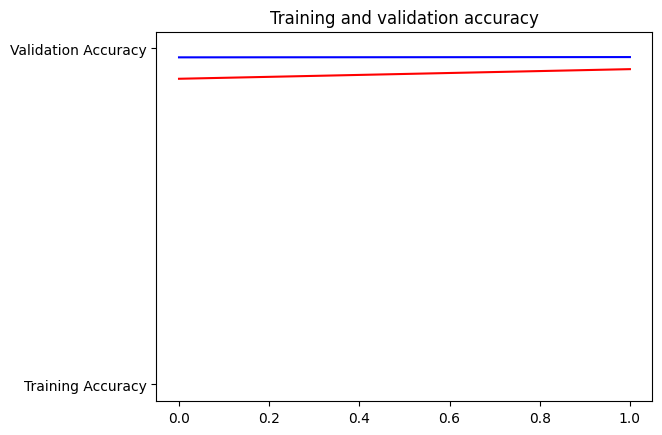

<Figure size 640x480 with 0 Axes>

In [ ]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()



## Predict on a test image

You can upload any image and have the model predict whether it's a dog or a cat.
- Find an image of a dog or cat
- Run the following code cell.  It will ask you to upload an image.
- The model will print "is a dog" or "is a cat" depending on the model's prediction.

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving Screenshot (386).png to Screenshot (386).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
[0.35617608]
Screenshot (386).png is a cat
